In [1]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.style
import matplotlib as mpl


In [2]:
# Read csv file 

wbcd = pd.read_csv('./data/breast-cancer-wisconsin.data.csv')
wbcd.head()

,id,clump thickness,uniformity of cell size,uniformity of cell shape,marginal adhesion,ingle epit helical cell size,bare nucleoi,bland chromatin,normal nuclei,mitoses,diagnosis
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [3]:
print('Dataset Size:', wbcd.shape,'\n')

wbcd['diagnosis'] = wbcd['diagnosis'].astype('int64')

print('Data types :\n', wbcd.dtypes,'\n')

col_names = list(wbcd.columns)
print('column Names = ', col_names, '\n')

Dataset Size: (699, 11) 

Data types :
 id                               int64
clump thickness                  int64
uniformity of cell size          int64
uniformity of cell shape         int64
marginal adhesion                int64
ingle epit helical cell size     int64
bare nucleoi                    object
bland chromatin                  int64
normal nuclei                    int64
mitoses                          int64
diagnosis                        int64
dtype: object 

column Names =  ['id', 'clump thickness', 'uniformity of cell size', 'uniformity of cell shape ', 'marginal adhesion', 'ingle epit helical cell size', 'bare nucleoi', 'bland chromatin', 'normal nuclei', 'mitoses', 'diagnosis'] 



In [4]:
wbcd[wbcd['bare nucleoi'] == "?"]

,id,clump thickness,uniformity of cell size,uniformity of cell shape,marginal adhesion,ingle epit helical cell size,bare nucleoi,bland chromatin,normal nuclei,mitoses,diagnosis
23,1057013,8,4,5,1,2,?,7,3,1,4
40,1096800,6,6,6,9,6,?,7,8,1,2
139,1183246,1,1,1,1,1,?,2,1,1,2
145,1184840,1,1,3,1,2,?,2,1,1,2
158,1193683,1,1,2,1,3,?,1,1,1,2
164,1197510,5,1,1,1,2,?,3,1,1,2
235,1241232,3,1,4,1,2,?,3,1,1,2
249,169356,3,1,1,1,2,?,3,1,1,2
275,432809,3,1,3,1,2,?,2,1,1,2
292,563649,8,8,8,1,2,?,6,10,1,4


In [5]:
# Remove data with '?'
wbcd['bare nucleoi'].replace("?", np.NAN, inplace=True)
wbcd = wbcd.dropna()

In [6]:
wbcd['bare nucleoi'] = wbcd['bare nucleoi'].astype('int64')
wbcd.dtypes

id                              int64
clump thickness                 int64
uniformity of cell size         int64
uniformity of cell shape        int64
marginal adhesion               int64
ingle epit helical cell size    int64
bare nucleoi                    int64
bland chromatin                 int64
normal nuclei                   int64
mitoses                         int64
diagnosis                       int64
dtype: object

In [7]:
# Check for missing values
wbcd.isnull().sum()

id                              0
clump thickness                 0
uniformity of cell size         0
uniformity of cell shape        0
marginal adhesion               0
ingle epit helical cell size    0
bare nucleoi                    0
bland chromatin                 0
normal nuclei                   0
mitoses                         0
diagnosis                       0
dtype: int64

In [8]:
np.where(wbcd.isnull())

(array([], dtype=int64), array([], dtype=int64))

In [9]:
wbcd['bare nucleoi'].value_counts()

1     402
10    132
5      30
2      30
3      28
8      21
4      19
9       9
7       8
6       4
Name: bare nucleoi, dtype: int64

In [10]:
# Data cleaning, drop unnecessary columns id and Unnamed: 32
wbcd.drop(['id'], axis = 1, inplace = True)

wbcd.head()

,clump thickness,uniformity of cell size,uniformity of cell shape,marginal adhesion,ingle epit helical cell size,bare nucleoi,bland chromatin,normal nuclei,mitoses,diagnosis
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [11]:
# Prepare target column for analysis
wbcd['diagnosis'].value_counts()

2    444
4    239
Name: diagnosis, dtype: int64

In [12]:
# wbcd['bare nucleoi'] = wbcd['bare nucleoi'].astype('int64')

In [13]:
# Change dependent variable (target) to binary

wbcd['diagnosis'] = wbcd['diagnosis']/2-1

In [14]:
wbcd['diagnosis'].value_counts()

0.0    444
1.0    239
Name: diagnosis, dtype: int64

In [15]:
# Split dataframe based on target label Benign or Malignant

wbcd_p = wbcd[wbcd['diagnosis'] == 1]
wbcd_n = wbcd[wbcd['diagnosis'] == 0]


In [16]:
# Dataframe for counts
stat_op = wbcd.diagnosis.value_counts()
stat_op = pd.DataFrame(pd.Series(stat_op))
stat_op.index = ['Benign', 'Malignant']

# Add percentage column in stat_op dataframe

stat_op['Percentage'] = stat_op['diagnosis']*100/sum(stat_op['diagnosis'])
stat_op.round(2)

,diagnosis,Percentage
Benign,444,65.01
Malignant,239,34.99


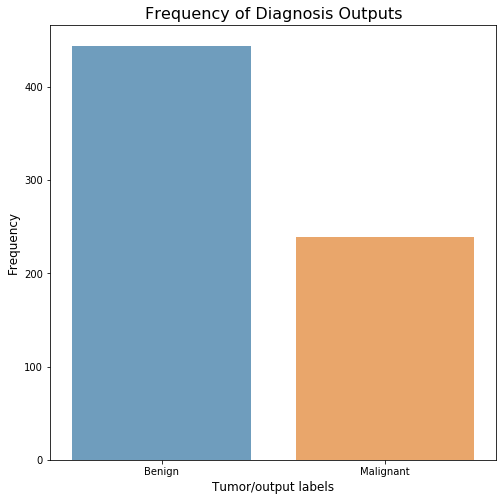

In [17]:
# Visulalize classification of Benign and Malignant in given dataset

plt.figure(figsize=(8,8)) 

sns.barplot(x = ['Benign', 'Malignant'], y = 'diagnosis', data = stat_op, alpha = .7)

plt.title('Frequency of Diagnosis Outputs', size = 16)

plt.xlabel('Tumor/output labels', size = 12)

plt.ylabel('Frequency', size = 12)

plt.show()

In [44]:
X = wbcd.drop(['diagnosis'], axis =1)
X_col = X.columns

X_col

Index(['clump thickness', 'uniformity of cell size',
       'uniformity of cell shape ', 'marginal adhesion',
       'ingle epit helical cell size', 'bare nucleoi', 'bland chromatin',
       'normal nuclei', 'mitoses'],
      dtype='object')

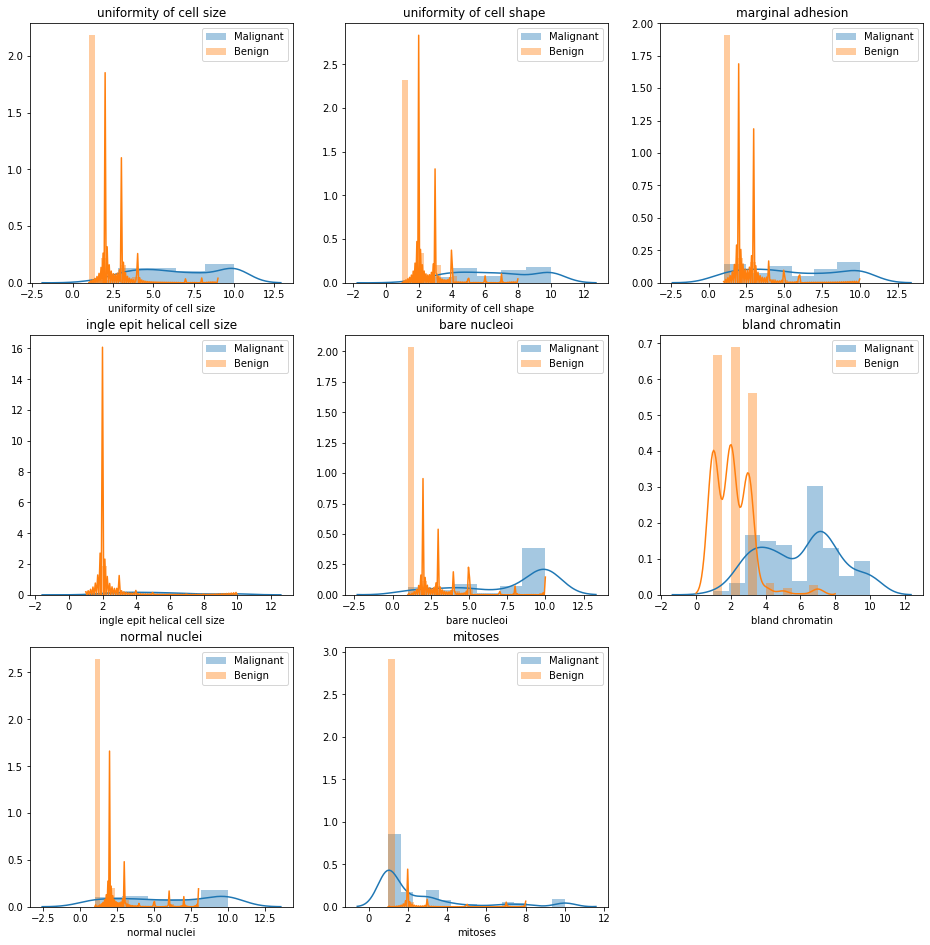

In [19]:
# Tumor charcteristic's visualization - Histogram (mean of features)  

char_fig = plt.figure(figsize = (16,22))

for i,f in enumerate(X_col[1:10]):
    
    i +=1 # i = 0, incrase to start from 1
    
    ax = char_fig.add_subplot(4,3,i)
    
    sns.distplot(wbcd_p[f], kde = True, label='Malignant')
   
    sns.distplot(wbcd_n[f], kde = True, label='Benign')
    
    ax.set_title(f)
    
    plt.legend()
    
plt.show()   


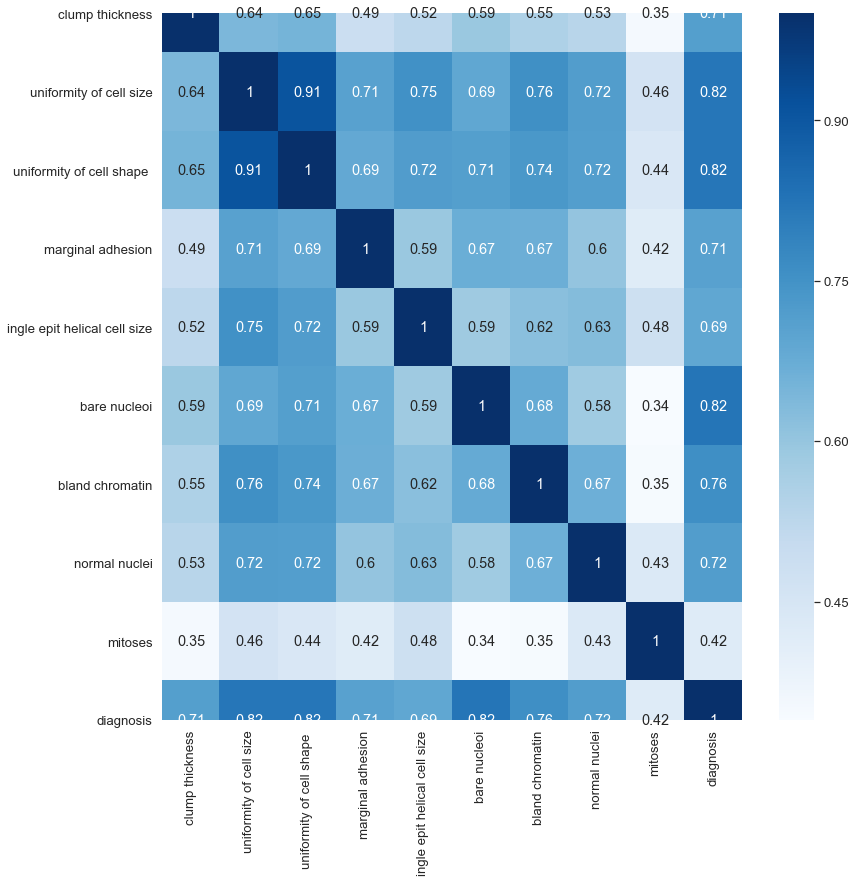

In [20]:
# correlation matrix

plt.figure(figsize = (13, 13))

sns.set(font_scale= 1.2)

sns.heatmap(wbcd.corr(), cmap = 'Blues', annot = True)

plt.show()

### 'uniformity of cell size' and 'uniformity of cell shape' are highly correlated. 

In [21]:
# Split data in 70-30 partition

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(wbcd, wbcd['diagnosis'], test_size = 0.3, random_state = 99)

## Models

### k-NN

In [22]:
from sklearn.neighbors import KNeighborsClassifier
# from sklearn.model_selection import cross_val_score, KFold


In [23]:
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.model_selection import GridSearchCV

Accuracy_Mean = []
kfold = []

for k in range(1, 30, 2): # k is odd

    knn = KNeighborsClassifier(n_neighbors = k)

    score = cross_val_score(knn, X_train, y_train, cv = 20, scoring= 'accuracy')
    
    Accuracy_Mean.append(score.mean())
    
    kfold.append(k)
    
    print('k=', k, '; mean CV accuracy', score.mean().round(3),';std:', score.std().round(3))

k= 1 ; mean CV accuracy 0.965 ;std: 0.033
k= 3 ; mean CV accuracy 0.973 ;std: 0.035
k= 5 ; mean CV accuracy 0.973 ;std: 0.035
k= 7 ; mean CV accuracy 0.969 ;std: 0.037
k= 9 ; mean CV accuracy 0.969 ;std: 0.034
k= 11 ; mean CV accuracy 0.969 ;std: 0.034
k= 13 ; mean CV accuracy 0.973 ;std: 0.033
k= 15 ; mean CV accuracy 0.971 ;std: 0.038
k= 17 ; mean CV accuracy 0.971 ;std: 0.038
k= 19 ; mean CV accuracy 0.971 ;std: 0.038
k= 21 ; mean CV accuracy 0.968 ;std: 0.037
k= 23 ; mean CV accuracy 0.968 ;std: 0.04
k= 25 ; mean CV accuracy 0.968 ;std: 0.04
k= 27 ; mean CV accuracy 0.968 ;std: 0.04
k= 29 ; mean CV accuracy 0.968 ;std: 0.04


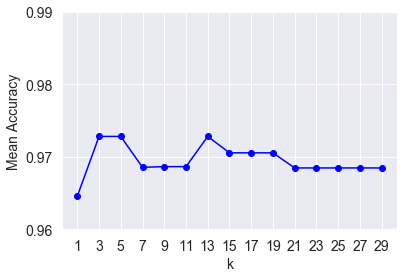

In [24]:
import matplotlib.pyplot as plt

plt.plot(kfold, Accuracy_Mean, marker = 'o', color = 'blue')

plt.xlabel('k', size = 14)

plt.xticks(np.arange(1,31,2), size = 14)

plt.ylabel('Mean Accuracy', size = 14)

plt.yticks(np.arange(0.96,0.99,0.01), size = 14)

plt.show()


In [25]:
knn = KNeighborsClassifier(n_neighbors = 3, weights='distance')

knn.fit(X_train,y_train)

y_knn_pred = knn.predict(X_test)

In [26]:
from sklearn import metrics

acc = metrics.accuracy_score(y_test, y_knn_pred)

acc.round(4)

0.9805

In [27]:
cm = metrics.confusion_matrix(y_test, y_knn_pred)

wbcd_cm = pd.DataFrame(data = cm, columns = ['predict: Benign', 'predict: Malignant'], 
                    index = ['true: Benign', 'true: Malignant'])

wbcd_cm

,predict: Benign,predict: Malignant
true: Benign,140,2
true: Malignant,2,61


In [28]:
from sklearn.linear_model import LogisticRegression


In [29]:
lr = LogisticRegression(solver='lbfgs') #instantiate the model-step 1
  
lr.fit(X_train,y_train)

y_pred = lr.predict(X_test)

y_proba = lr.predict_proba(X_test)[:,1]

score = metrics.accuracy_score(y_test, y_pred).round(4)

print(score)

1.0


In [30]:
# precision

metrics.precision_score(y_test, y_pred).round(4)

1.0

In [31]:
fpr, tpr, threshold = metrics.roc_curve(y_test,y_proba)
np.column_stack((fpr, tpr, threshold))

array([[0.00000000e+00, 0.00000000e+00, 1.99998534e+00],
       [0.00000000e+00, 1.58730159e-02, 9.99985337e-01],
       [0.00000000e+00, 3.17460317e-01, 9.97856618e-01],
       [0.00000000e+00, 3.49206349e-01, 9.97659089e-01],
       [0.00000000e+00, 1.00000000e+00, 5.67559117e-01],
       [1.47887324e-01, 1.00000000e+00, 8.42692023e-03],
       [1.61971831e-01, 1.00000000e+00, 8.34588235e-03],
       [1.69014085e-01, 1.00000000e+00, 8.03061854e-03],
       [1.83098592e-01, 1.00000000e+00, 7.79420809e-03],
       [2.46478873e-01, 1.00000000e+00, 6.19597168e-03],
       [2.67605634e-01, 1.00000000e+00, 6.07676142e-03],
       [2.81690141e-01, 1.00000000e+00, 5.75273685e-03],
       [3.38028169e-01, 1.00000000e+00, 5.54488803e-03],
       [3.52112676e-01, 1.00000000e+00, 5.39851249e-03],
       [3.66197183e-01, 1.00000000e+00, 5.15564779e-03],
       [4.15492958e-01, 1.00000000e+00, 4.04713384e-03],
       [4.43661972e-01, 1.00000000e+00, 4.03421757e-03],
       [4.57746479e-01, 1.00000

Text(0, 0.5, 'True Positive Rate/Hit Rate')

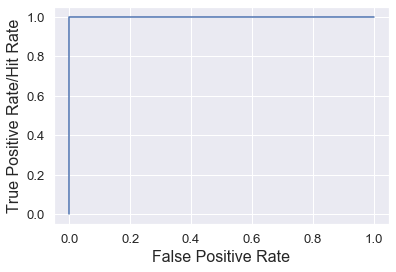

In [32]:
plt.plot(fpr, tpr)

plt.xlabel('False Positive Rate', size = 16)

plt.ylabel('True Positive Rate/Hit Rate', size = 16)

In [33]:
# Area under curve

metrics.auc(fpr, tpr)

1.0